In [ ]:
!pip3 install pandas
!pip install protobuf==3.12.0
!pip install prophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 11.6 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.10.0 requires protobuf<4,>=3.13, but you have protobuf 3.12.0 which is incompatible.
tensorflow-datasets 4.6.0 requires protobuf>=3.12.2, but you have protobuf 3.12.0 which is incompatible.
googleapis-common-protos 1.56.4 requires protobuf<5.0.0dev,>=3.15.0, but you have protobuf 3.12.0 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
from prophet import Prophet

Prophet sigue la API del modelo sklearn. Creamos una instancia de la clase Prophet y luego llamamos a sus métodos de ajuste y predicción.

La entrada a Prophet es siempre un marco de datos con dos columnas: ds e y. La columna ds (marca de fecha) debe tener un formato esperado por Pandas, idealmente AAAA-MM-DD para una fecha o AAAA-MM-DD HH:MM:SS para una marca de tiempo. La columna y debe ser numérica y representa la medida que deseamos pronosticar.


In [ ]:
data=pd.read_csv('sessionDicsys22.csv')
data=data.rename(columns={"date": "FECHA", "newUsers": "y"})
data['FECHA']=pd.to_datetime(data['FECHA'])

#data2 = data[(data['sessionSource']=="(direct)") & (data['sessionSource']=="/")]
data2=data[ ['FECHA','y']]
data2.set_index('FECHA', inplace=True)
data.head(3)


FileNotFoundError: ignored

In [ ]:
data2

,y
FECHA,
2022-01-10,1374
2022-01-05,507
2022-01-04,374
2022-01-07,378
2022-01-06,245
...,...
2022-06-28,0
2022-06-26,0
2022-06-28,0


In [ ]:
data2.to_csv("dycsisfechadata2.csv")

In [ ]:
data2 = pd.read_csv("dycsisfechadata2.csv")
data2.head()

,FECHA,y
0,2022-01-10,1374
1,2022-01-05,507
2,2022-01-04,374
3,2022-01-07,378
4,2022-01-06,245


In [ ]:
data2 = pd.read_csv("dycsisfechadata2.csv")
data2['FECHA'] = pd.to_datetime(data2['FECHA'])
data2.columns = ['ds', 'y']

In [ ]:
data2=data2.set_index('ds')

In [ ]:
df = data2.resample('w').agg({'y': 'sum'})


In [ ]:
df.head()

,y
ds,
2022-01-02,108
2022-01-09,1821
2022-01-16,1648
2022-01-23,352
2022-01-30,209


In [ ]:
df=df.reset_index()
df.head()

,ds,y
0,2022-01-02,108
1,2022-01-09,1821
2,2022-01-16,1648
3,2022-01-23,352
4,2022-01-30,209


In [ ]:
df.shape

(32, 2)

## Prueba Test

In [ ]:
train=df.iloc[:-4]

#Nos trae los datos hasta 4

In [ ]:
train.shape

(28, 2)

In [ ]:
train.tail()

,ds,y
23,2022-06-12,344
24,2022-06-19,280
25,2022-06-26,175
26,2022-07-03,321
27,2022-07-10,334


In [ ]:
test=df.iloc[28:]

# Nos trae los datos desde 28 en adelante

In [ ]:
test.shape

(4, 2)

In [ ]:
test

# Test nos trae los datos - Revisar porque la primer semana de agosto tiene un bajo volumen (y)

,ds,y
28,2022-07-17,375
29,2022-07-24,363
30,2022-07-31,333
31,2022-08-07,48


In [ ]:
m = Prophet()
m.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 21.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdz6o6lxs/_ttseq6o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdz6o6lxs/lsnu8g4i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64813', 'data', 'file=/tmp/tmpdz6o6lxs/_ttseq6o.json', 'init=/tmp/tmpdz6o6lxs/lsnu8g4i.json', 'output', 'file=/tmp/tmp0yon183a/prophet_model-20220906162951.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:29:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1]

In [ ]:
future = m.make_future_dataframe(periods=4, freq='W')
future.tail()

# ds trae los datos de 4 semanas (7 dias)

,ds
27,2022-07-10
28,2022-07-17
29,2022-07-24
30,2022-07-31
31,2022-08-07


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# Revisar los valores de yhat que son mucho menores a los datos historicos originales

,ds,yhat,yhat_lower,yhat_upper
27,2022-07-10,93.670420,-386.369516,558.352974
28,2022-07-17,76.420964,-430.118681,551.943993
29,2022-07-24,59.171508,-419.641184,532.974379
30,2022-07-31,41.922052,-429.226169,548.220517
31,2022-08-07,24.672595,-460.552872,512.880097


Ajustamos el modelo instanciando un nuevo objeto Prophet. Cualquier configuración del procedimiento de pronóstico se pasa al constructor. Luego llama a su método de ajuste y pasa el marco de datos histórico. El ajuste debe tomar de 1 a 5 segundos.

In [ ]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdz6o6lxs/ico2uzma.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdz6o6lxs/2_wxb9bo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10229', 'data', 'file=/tmp/tmpdz6o6lxs/ico2uzma.json', 'init=/tmp/tmpdz6o6lxs/2_wxb9bo.json', 'output', 'file=/tmp/tmpfgn16bdh/prophet_model-20220906161341.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:13:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1]

Luego, las predicciones se realizan en un marco de datos con una columna ds que contiene las fechas para las que se debe realizar una predicción. Puede obtener un marco de datos adecuado que se extienda hacia el futuro una cantidad específica de días utilizando el método auxiliar Prophet.make_future_dataframe. De forma predeterminada, también incluirá las fechas del historial, por lo que también veremos el ajuste del modelo.

In [ ]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
87,2022-10-02
88,2022-10-03
89,2022-10-04
90,2022-10-05
91,2022-10-06


El método de predicción asignará a cada fila en el futuro un valor predicho que denomina yhat. Si pasa fechas históricas, proporcionará un ajuste dentro de la muestra. El objeto de pronóstico aquí es un nuevo marco de datos que incluye una columna que contiene el pronóstico, así como columnas para componentes e intervalos de incertidumbre.

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
87,2022-10-02,28.809632,-458.806441,460.539422
88,2022-10-03,27.021695,-390.315116,491.354663
89,2022-10-04,25.233759,-432.994617,483.060416
90,2022-10-05,23.445822,-436.930569,454.644447
91,2022-10-06,21.657885,-424.503473,484.693864


Si se desea ver los componentes del pronóstico, podemos utilizar el método Prophet.plot_components. De forma predeterminada, veremos la tendencia, la estacionalidad anual y la estacionalidad semanal de la serie temporal. Si incluye días festivos, también se verá aquí.

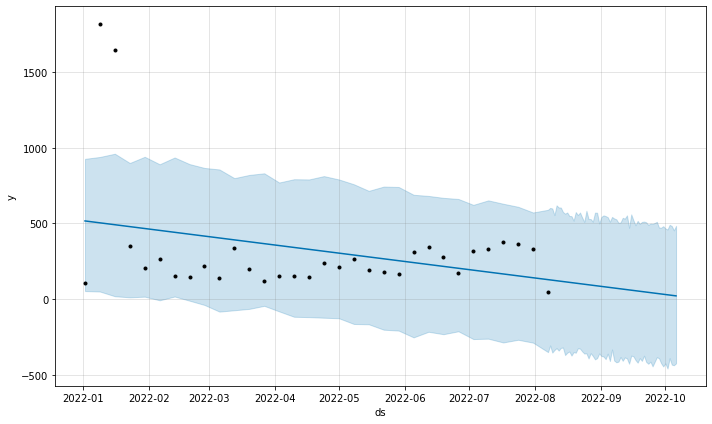

In [ ]:
fig1 = m.plot(forecast)

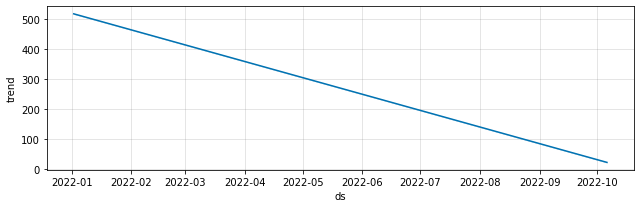

In [ ]:
fig2 = m.plot_components(forecast)

La estacionalidad tiene una incertidumbre baja al comienzo de cada mes donde hay puntos de datos, pero tiene una varianza posterior muy alta en el medio. Cuando ajuste Prophet a los datos mensuales, solo haga pronósticos mensuales, lo que se puede hacer pasando la frecuencia a make_future_dataframe:

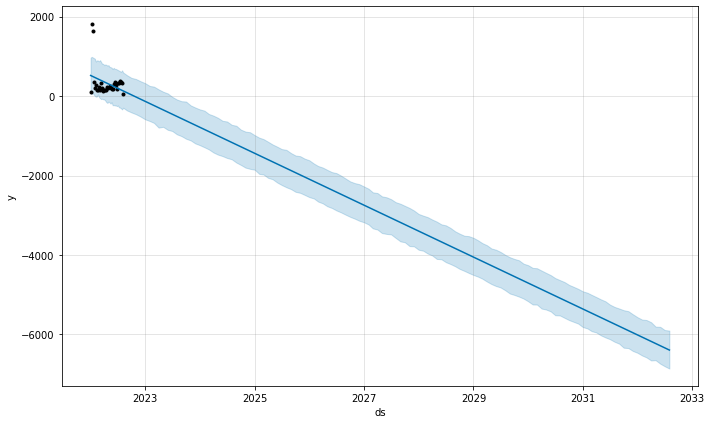

In [ ]:
future = m.make_future_dataframe(periods=120, freq='MS')
fcst = m.predict(future)
fig = m.plot(fcst)

En Python, la frecuencia puede ser cualquier cosa de la lista pandas de cadenas de frecuencia aquí: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases. el MS utilizado aquí es inicio de mes, lo que significa que el punto de datos se coloca al inicio de cada mes.

En datos mensuales, la estacionalidad anual también se puede modelar con regresores adicionales binarios. En particular, el modelo puede usar 12 regresores adicionales como is_jan, is_feb, etc. donde is_jan es 1 si la fecha es en enero y 0 en caso contrario. Este enfoque evitaría la falta de identificación dentro del mes que se vio anteriormente. Asegúarsse de usar yearly_seasonality=False si se agregan regresores adicionales mensuales.